# `analyzing-KPop`
K-pop is growing popularity, and there's no sign of stopping. With this, let's find out its various trends! Simply put, this program analyzes trends within **K-Pop idols, groups, and music videos from 1992 to 2020.** For more information, kindly read the [informational document](https://github.com/buzz-lightsnack-2007/analyzing-KPop/blob/main/ReadMe.md). 

## Load It Up!

### Loading Functions
Let's load the necessary modules and functions. **Please always run this function first.**

In [17]:
# Loading Functions
# Formatting
formatting = {
	'clear': '\033[0m',
	'color': {
		'purple': '\033[95m',
		'cyan': '\033[96m',
		'cyan_dark': '\033[36m',
		'blue': '\033[94m',
		'green': '\033[92m',
		'yellow': '\033[93m',
		'red': '\033[91m'
	},
	'font': {
		'bold': '\033[1m',
		'underline': '\033[4m'
	}
}

# Screen messages
def info_status(message):
	print(formatting['font']['bold'] + 'Status: \t' + formatting['clear'] + message)
def info_err(message):
	print(formatting['font']['bold'] + formatting['color']['red'] + '🗙 Error: \t' + formatting['clear'] + formatting['clear'] + message)
def info_warning(message):
	print(formatting['font']['bold'] + formatting['color']['yellow'] + '⚠ Warning: \t' + formatting['clear'] + formatting['clear'] + message)
def info_success(message):
	print(formatting['font']['bold'] + formatting['color']['green'] + '✓ Success: \t' + formatting['clear'] + formatting['clear'] + message)

try: 
	# Import modules. 
	import os
	import pandas
	import matplotlib
	import collections

except: 
	info_err("Your runtime is missing either pandas or MatPlotLib.")
	exit()
else: 
	info_success("The necessary modules have been loaded properly. ")

✓ Success: 	The necessary modules have been loaded properly. 


### Loading Files
Let's check if the files are there!

In [2]:
# Loading Files
def load_check_files(): 
	"""
		This function checks if there are any files inside the data/kpop_idols folder. 

		Parameters: none
		Returns: dictionary containing the major data folder directory and the list of CSV files
	"""
	# Create return variable. 
	directory_suggested = {}

	# Generate list of directories. Kindly change this if you placed the four files elsewhere. 
	directory_list_names_expected = ['data/', 'data/kpop_idols/']

	for directory_name in directory_list_names_expected:
		# Generate the folder's details. 
		directory_contents = sorted(os.listdir(directory_name))

		# expected contents
		directory_expected_contents = ['kpop_idols_boy_groups.csv', 'kpop_idols_girl_groups.csv', 'kpop_idols.csv', 'kpop_music_videos.csv']

		if (sorted(directory_contents) == sorted(directory_expected_contents)): 
			directory_suggested['path'] = directory_name
			directory_suggested['contents'] = directory_contents

			# Let the user know that it is working. 
			info_success(("Files found at folder " + directory_name + " relative to this file."))

			# Return the data. 
			return(directory_suggested)
		
	else: 
		info_err("Folder not found! You might have probably selected the wrong directory; in this case, you may edit the directory_list_names_expected variable. If not, make sure that the files are named properly. ")

try: 
	data_source = load_check_files()
except NameError as e: 
	print("Please always run the first function above when opening this notebook.")
except: 
	info_err("Folder not found! You might have probably selected the wrong directory; in this case, you may edit the directory_list_names_expected variable.")

✓ Success: 	Files found at folder data/kpop_idols/ relative to this file.


## Convert
Convert the list to a readable type. _You must have already run the previous two cells._

In [5]:
def data_convert(data_source): 
	"""
		Convert the data to a pandas dataframe. 

		Parameters: 
			data_source: (str)the CSV file
		Returns: dictionary of data
	"""

	# Convert to pandas data frame. 
	data_table = pandas.read_csv(data_source)
	data = data_table.to_dict('list')

	# Return the data frame. 
	return(data)

def data_convert_all(data_source): 
	"""
		Convert all of the databases. 

		Parameters: 
			data_source: (dict) containing the directory and the CSV name
		Returns: dictionary containing the datas
	"""

	# Create the database dictionary. 
	data_all = {}

	# Convert the data. 
	for data_source_CSV in data_source['contents']: 
		data_all[data_source_CSV[:-4]] = data_convert((data_source['path']+ data_source_CSV))
	
	# Return the dictionary. 
	return(data_all)

# Save the data into a database. 
database = data_convert_all(data_source)

# database as output 
database

{'kpop_idols': {'Stage Name': ['A.M',
   'Ace',
   'Aeji',
   'AhIn',
   'Ahra',
   'Ahyoung',
   'Ahyung',
   'Ailee',
   'Aini',
   'Aisha',
   'AleXa',
   'Alice',
   'Allen',
   'Amber',
   'Anne',
   'Anthony',
   'Arang',
   'Arang',
   'Ari',
   'Ari',
   'Arie',
   'Arin',
   'Aron',
   'Asahi',
   'Ashley',
   'Aurora',
   'Avin',
   'Ayno',
   'B-Bomb',
   'B-Joo',
   'B.I',
   'B.S',
   'Babysoul',
   'Bada',
   'Baekah',
   'Baekho',
   'Baekhyun',
   'BamBam',
   'Bang Chan',
   'Baro',
   'Baron',
   'BC',
   'Bekah',
   'BEL',
   'Bella',
   'Belle',
   'Benji',
   'Beomgyu',
   'Bian',
   'Bic',
   'Bin',
   'Binnie',
   'Bitsaeon',
   'Bitto',
   'Blue',
   'BM',
   'BoA',
   'Boa',
   'Bobby',
   'Bohyung',
   'Bokeun',
   'Bom',
   'Bomi',
   'Bomin',
   'Bomin',
   'Bona',
   'Boni',
   'Bora',
   'Bora',
   'Boram',
   'Bullet',
   'BX',
   'Byungchan',
   'C.A.P',
   'Cao Lu',
   'Casper',
   'Castle J',
   'Cha Hoon',
   'Chaea',
   'Chaebin',
   'Chaehyun',
   '

## On Idols
Let's gather up some statistics on the idols. 

### Surnames
How much are their surnames different? 

    surname  count  percentage
0         성      4    0.003067
1         장     23    0.017638
2         권     15    0.011503
3         이    183    0.140337
4         고      8    0.006135
..      ...    ...         ...
121       쉬      1    0.000767
122       뚱      1    0.000767
123       설      1    0.000767
124       옌      1    0.000767
125       소      1    0.000767

[126 rows x 3 columns]


findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
C:\Users\buzz-lightsnack-2007\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Noto Sans KR' not found.
C:\Users\buzz-lightsnack-2007\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Noto Sans KR' not found.
C:\Users\buzz-lightsnack-2007\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2k

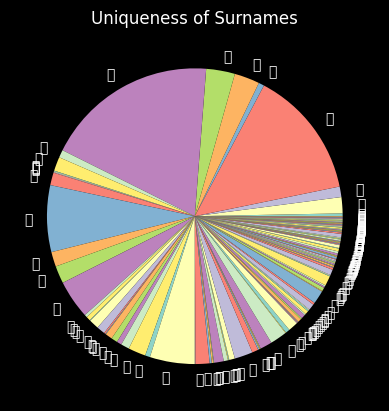

['성',
 '장',
 '권',
 '이',
 '고',
 '조',
 '강',
 '이',
 '김',
 '허',
 '김',
 '송',
 '앨',
 '엠',
 '이',
 '엔',
 '손',
 '박',
 '김',
 '황',
 '전',
 '최',
 '곽',
 '하',
 '애',
 '양',
 '박',
 '노',
 '이',
 '김',
 '김',
 '이',
 '이',
 '김',
 '김',
 '강',
 '변',
 '꾼',
 '방',
 '차',
 '최',
 '진',
 '김',
 '최',
 '최',
 '진',
 '배',
 '최',
 '유',
 '남',
 '김',
 '배',
 '김',
 '이',
 '정',
 '매',
 '권',
 '김',
 '김',
 '김',
 '김',
 '박',
 '윤',
 '최',
 '김',
 '김',
 '최',
 '윤',
 '김',
 '전',
 '진',
 '이',
 '최',
 '방',
 '차',
 '저',
 '손',
 '차',
 '김',
 '최',
 '김',
 '채',
 '윤',
 '이',
 '박',
 '이',
 '맹',
 '김',
 '김',
 '송',
 '정',
 '김',
 '이',
 '손',
 '이',
 '박',
 '정',
 '강',
 '조',
 '서',
 '우',
 '송',
 '최',
 '이',
 '이',
 '강',
 '김',
 '황',
 '박',
 '김',
 '김',
 '김',
 '청',
 '중',
 '장',
 '지',
 '최',
 '박',
 '허',
 '최',
 '최',
 '박',
 '김',
 '이',
 '김',
 '이',
 '신',
 '홍',
 '이',
 '조',
 '도',
 '이',
 '장',
 '정',
 '김',
 '강',
 '정',
 '대',
 '이',
 '황',
 '송',
 '김',
 '정',
 '송',
 '유',
 '김',
 '이',
 '이',
 '홍',
 '후',
 '박',
 '강',
 '전',
 '안',
 '박',
 '김',
 '이',
 '남',
 '이',
 '조',
 '이',
 '김',
 '김',
 '임',
 '김',
 '박',
 '김'

<Figure size 640x480 with 0 Axes>

In [23]:
def name_extract(name = str, section = 1): 
	"""
		Extract the specified part of the name following the East Asian naming format, which always has surnames at the front.

		Parameters: 
			name: (str) the name
			section: (int) the part of the name to use, in which "0" means no change, "1" stands for the last name while "2" stands for the first name
		Returns: cleaned name
	"""

	# Make sure that the input is correct. 
	section = abs(int(section))
	if (section > 2): 
		section = 0

	# Return the correct section of the name. 
	if section == 1: 
		return(name[0])
	elif section == 2: 
		return(name[1:3])
	else: 
		return(name)

def analyze_surnames_unique(dataset): 
	"""
		Count the unique surnames. (This should only be used in analyze_surnames().)

		Parameters: 
			dataset: the dataset containing names
		Returns: (dict) count of unique surnames
	"""

	# Create variable for dataset. 
	data_unique = {'surname': [], 'count': [], 'percentage': []}

	# Get the count. 
	data_unique_count = collections.Counter(dataset)

	# Get the percentages. 
	data_unique_count_percentages = {}
	for surname in sorted(data_unique_count.keys()): 
		data_unique_count_percentages[surname] = (data_unique_count[surname] / len(dataset))

	# Consolidate the data. 
	for surname in data_unique_count.keys(): 
		data_unique['surname'].append(surname)
		data_unique['count'].append(data_unique_count[surname]) 
		data_unique['percentage'].append(data_unique_count_percentages[surname]) 
	
	# Convert to pandas and display it. 
	data_unique_df = pandas.DataFrame(data_unique)

	# Print the cleaned dataframe. 
	print(data_unique_df)

	# Return the data. 
	return(data_unique_count)

def analyze_surnames_graphs(dataset): 
	"""
		Create the graphs for analyze_surnames(). 

		Parameters: 
			dataset: (dict) the dataset containing the count per surname
		Returns: none
	"""

	# Importing modules
	import matplotlib.pyplot as plt

    # The metadata
	metadata_name = "Uniqueness of Surnames"
    
    # Configure the graph using the metadata
	plt.title(metadata_name)

	# Create the graph. 
	plt.pie(list(dataset.values()), labels=list(dataset.keys()))

	# Display and save the graph. 
	plt.show()
	plt.savefig("output/Surnames.pdf")

def analyze_surnames(dataset, column_name_key): 
	"""
		Analyze the surnames following the East Asian naming format.  

		Parameters: 
			dataset: the dataset containing names
			column_name_key: (str) the key of the column containing the names
		Returns: none
	"""

	# Get the specific data. 
	names = dataset[column_name_key]

	# Create the placeholder for the names. 
	names_surnames = []

	# Extract the surnames.  
	for name in names: 
		# Some names are not defined. Catch it if that occurs. 
		try: 
			names_surnames.append(str(name[0]))
		except: 
			# Skip the name. 
			pass

	# Count unique. 
	names_unique = analyze_surnames_unique(names_surnames)

	# Draw the graphs. 
	analyze_surnames_graphs(names_unique)

	# Return the output.
	return(names_surnames)

analyze_surnames(database['kpop_idols'], 'Korean Name')